In [116]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error as MSE 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Load dataset
df = pd.read_csv('brest_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [118]:
# EDA
print(f"Shape of the dataset: {df.shape}")
print(f"Information of the dataset: \n{df.info()}")

Shape of the dataset: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64

In [119]:
print(f"Description of the dataset: \n{df.describe()}")
print(f"Null values in the dataset: \n{df.isnull().sum()}")  # df.isnull().sum()

Description of the dataset: 
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.

Decision classifier

The can capture non-linear relationships between features and labels and they do not require feature scaling

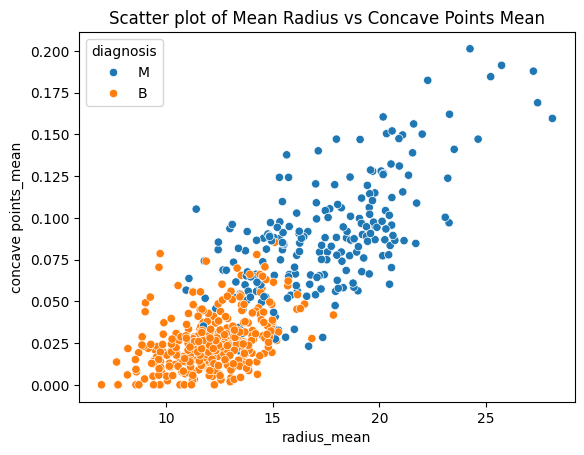

In [120]:
# Scatter plot of features
sns.scatterplot(data=df, x='radius_mean', y='concave points_mean', hue='diagnosis')
plt.title('Scatter plot of Mean Radius vs Concave Points Mean')
plt.show()

In [121]:
# Split the dataset into features and labels
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis']

In [122]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1)

In [123]:
# Instantiate and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=1)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
print(f"Predictions: {y_pred[:10]}")  # Display some predictions
# Evaluate the model
accuracy_Tr = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree classifier: {accuracy_Tr}")

Predictions: ['M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B']
Accuracy of the Decision Tree classifier: 0.9035087719298246


__Decision Regions__

__Decision Regions__: A region in the feature space where all instances are designed to one class label.

__Decision Boundry__ surface separating different decision regions.

In [124]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
print(f"Predictions: {y_pred_log[:10]}")  # Display some predictions
# Evaluate the model
accuracy_lg = accuracy_score(y_test, y_pred_log)
print(f"Accuracy of the Decision Tree classifier: {accuracy_lg}")


Predictions: ['M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B']
Accuracy of the Decision Tree classifier: 0.9473684210526315


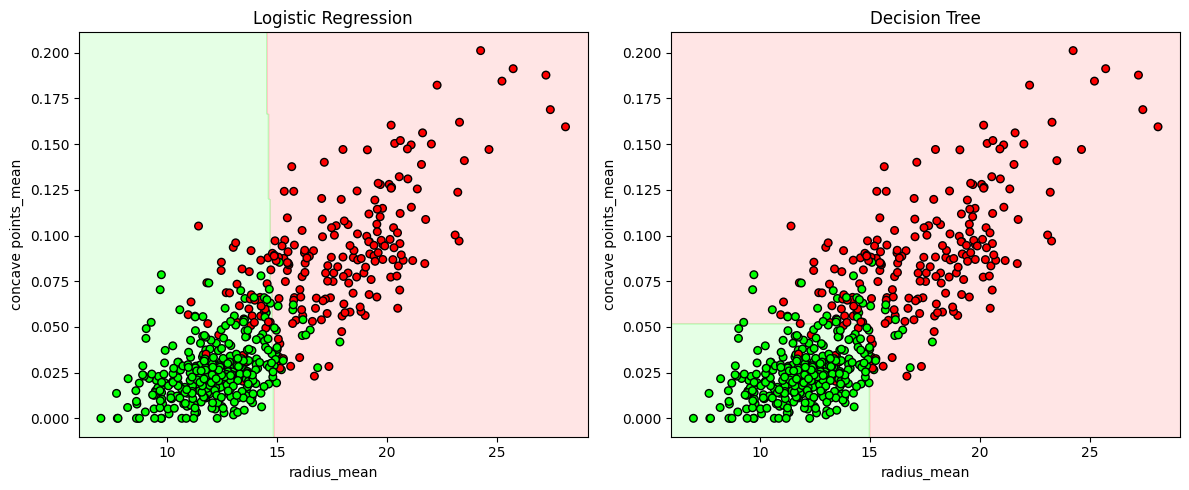

In [125]:
# Define a list called clfs containing the two classifiers logreg and dt_classifier
clfs = [logreg, dt_classifier]

# Select two features for visualization
feature1 = 'radius_mean'
feature2 = 'concave points_mean'

X_vis = X[[feature1, feature2]].values
y_vis = y.map({'M': 0, 'B': 1}).values  # Encode labels for plotting

# Fit classifiers on the selected features
for clf in clfs:
    clf.fit(X_vis, y_vis)

# Set up meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 0.01, X_vis[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Logistic Regression', 'Decision Tree']

for idx, clf in enumerate(clfs):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    scatter = axes[idx].scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=ListedColormap(['#FF0000', '#00FF00']), edgecolor='k', s=30)
    axes[idx].set_xlabel(feature1)
    axes[idx].set_ylabel(feature2)
    axes[idx].set_title(titles[idx])

plt.tight_layout()
plt.show()

__Classification_Tree Learning__


*Decision Tree* is a data structure containing hierarchy of nodes. 

_Node_ is a question or prediction

_Root_ is where the tree started growing 

_Internal node_ is a node that has a branch

_Leaf_ is a node that has no children (This where prediction is made)

In [126]:
# Instanciate and train the Decision Tree classifier with Gini impurity
dt_classifier_gini = DecisionTreeClassifier(criterion='gini',max_depth=2, random_state=1)
# Fit the model
dt_classifier_gini.fit(X_train, y_train)
# Make predictions
y_pred = dt_classifier_gini.predict(X_test)
# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred)
# Display the accuracy
print(f"Accuracy of the Decision Tree classifier: {accuracy_gini}")

Accuracy of the Decision Tree classifier: 0.9035087719298246


In [127]:
# Instanciate and train the Decision Tree classifier with entropy impurity
dt_classifier_ent = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
# Fit the model
dt_classifier_ent.fit(X_train, y_train)
# Make predictions
y_pred_ent = dt_classifier_ent.predict(X_test)
# Evaluate the model
accuracy_ent = accuracy_score(y_test, y_pred_ent)
# Display the accuracy
print(f"Accuracy of the Decision Tree classifier: {accuracy_ent}")

Accuracy of the Decision Tree classifier: 0.9210526315789473


__Decision Tree for Regression

In [128]:
# Convert the diagnosis labels to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [129]:
# Split the dataset into features and labels
X_dt = df.drop(columns=['id', 'Unnamed: 32', 'concave points_mean'])
y_dt = df['concave points_mean']

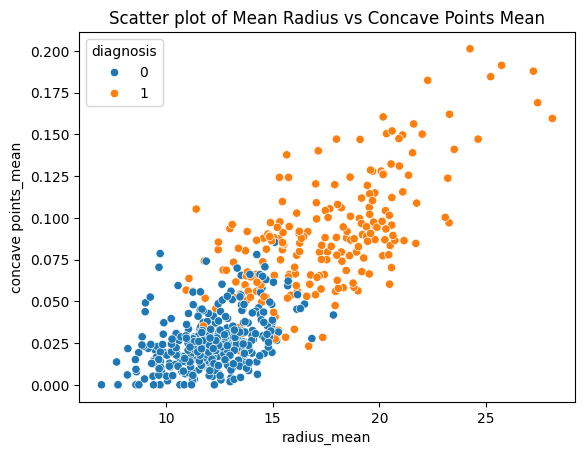

In [130]:
# Scatter plot of features
sns.scatterplot(data=df, x='radius_mean', y='concave points_mean', hue='diagnosis')
plt.title('Scatter plot of Mean Radius vs Concave Points Mean')
plt.show()

In [134]:
# Split the dataset into Training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, 
                                                    random_state=1)

In [ ]:
# Instantiaten # Decision Tree for Regression
dt_regressor = DecisionTreeRegressor(max_depth=2, 
                                     min_samples_leaf=0.15, random_state=1)
# Fit the model
dt_regressor.fit(X_train_dt, y_train_dt)
# Make predictions
y_pred_dt = dt_regressor.predict(X_test_dt)
# Evaluate the model
mse_dt = MSE(y_test_dt, y_pred_dt)
# Compute rmse
rmse_dt = np.sqrt(mse_dt)
print(f"RMSE of the Decision Tree regressor: {rmse_dt}")


RMSE of the Decision Tree regressor: 0.01769583973160296


In [140]:
# Instanciate Logistic Regression for Regression
logreg_regressor = LinearRegression()
# Fit the model
logreg_regressor.fit(X_train_dt, y_train_dt)
# Make predictions
y_pred_log = logreg_regressor.predict(X_test_dt)
# Evaluate the model
mse_log = MSE(y_test_dt, y_pred_log)
# Compute rmse
rmse_log = np.sqrt(mse_log)
print(f"RMSE of the Logistic Regression regressor: {rmse_log}")

RMSE of the Logistic Regression regressor: 0.0053081637948921


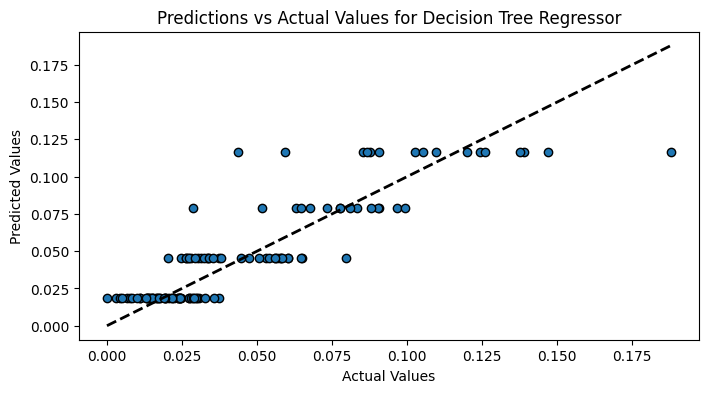

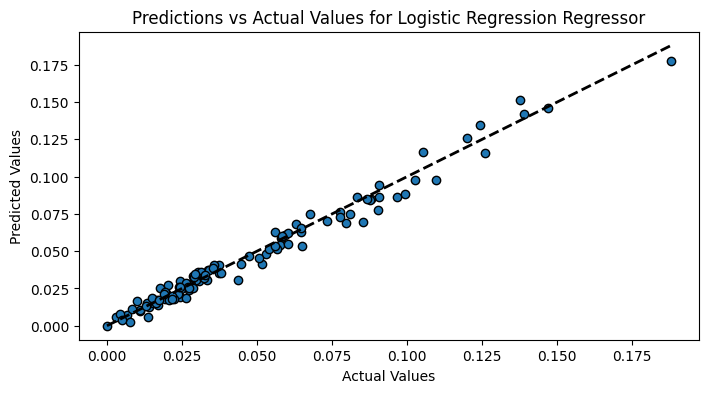

In [142]:
# plot the predictions vs actual values
plt.figure(figsize=(8, 4))
plt.scatter(y_test_dt, y_pred_dt, edgecolors=(0, 0, 0))

# plot the line of equality
plt.plot([y_test_dt.min(), y_test_dt.max()], [y_test_dt.min(), y_test_dt.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values for Decision Tree Regressor')
plt.show()

# plot the predictions vs actual values for Logistic Regression
plt.figure(figsize=(8, 4))
plt.scatter(y_test_dt, y_pred_log, edgecolors=(0, 0, 0))

# plot the line of equality
plt.plot([y_test_dt.min(), y_test_dt.max()], [y_test_dt.min(), y_test_dt.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values for Logistic Regression Regressor')
plt.show()

__Generalization Error__